In [0]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [48]:
file_url = "https://raw.githubusercontent.com/eraldoluis/lia-covid19ms/master/data/dadoscampogrande.csv"
dfcg = pd.read_csv(file_url)

file_url = "https://raw.githubusercontent.com/eraldoluis/lia-covid19ms/master/data/dadosms.csv"
dfms = pd.read_csv(file_url)

dftodos = pd.concat([dfms, dfcg])
'''
dftodos.Date = dftodos.Date.map(lambda x : datetime.datetime.strptime(x, "%m-%d-%Y"))
dfms.Date = dfms.Date.map(lambda x : datetime.datetime.strptime(x, "%m-%d-%Y"))
dfcg.Date = dfcg.Date.map(lambda x : datetime.datetime.strptime(x, "%m-%d-%Y"))
'''

ERROR! Session/line number was not unique in database. History logging moved to new session 59


'\ndftodos.Date = dftodos.Date.map(lambda x : datetime.datetime.strptime(x, "%m-%d-%Y"))\ndfms.Date = dfms.Date.map(lambda x : datetime.datetime.strptime(x, "%m-%d-%Y"))\ndfcg.Date = dfcg.Date.map(lambda x : datetime.datetime.strptime(x, "%m-%d-%Y"))\n'

In [49]:
dfcg.tail(10)

,State,Country,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,Suspected,Discarded,Excluded
20,"Campo Grande, MS",Brazil,NaN,19,0,0,03-23-2020,NaN,NaN,48.0,NaN,NaN
21,"Campo Grande, MS",Brazil,NaN,22,0,0,03-24-2020,NaN,NaN,21.0,NaN,NaN
22,"Campo Grande, MS",Brazil,NaN,22,0,0,03-25-2020,NaN,NaN,15.0,NaN,NaN
23,"Campo Grande, MS",Brazil,NaN,23,0,0,03-26-2020,NaN,NaN,23.0,NaN,NaN
24,"Campo Grande, MS",Brazil,NaN,24,0,0,03-27-2020,NaN,NaN,9.0,NaN,NaN
25,"Campo Grande, MS",Brazil,NaN,25,0,0,03-28-2020,NaN,NaN,13.0,NaN,NaN
26,"Campo Grande, MS",Brazil,NaN,29,0,0,03-29-2020,NaN,NaN,21.0,NaN,NaN
27,"Campo Grande, MS",Brazil,NaN,36,0,0,03-30-2020,NaN,NaN,21.0,NaN,NaN
28,"Campo Grande, MS",Brazil,NaN,37,0,0,03-31-2020,NaN,NaN,17.0,NaN,NaN
29,"Campo Grande, MS",Brazil,NaN,38,0,0,04-01-2020,NaN,NaN,18.0,NaN,NaN


In [50]:
dfms.tail(10)

,State,Country,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,Suspected,Discarded,Excluded
20,MS,Brazil,NaN,21,0,0,03-23-2020,NaN,NaN,70,198,11
21,MS,Brazil,NaN,24,0,0,03-24-2020,NaN,NaN,38,256,11
22,MS,Brazil,NaN,24,0,0,03-25-2020,NaN,NaN,34,289,11
23,MS,Brazil,NaN,25,0,0,03-26-2020,NaN,NaN,53,299,11
24,MS,Brazil,NaN,28,0,0,03-27-2020,NaN,NaN,51,337,11
25,MS,Brazil,NaN,31,0,0,03-28-2020,NaN,NaN,47,360,11
26,MS,Brazil,NaN,36,0,0,03-29-2020,NaN,NaN,44,388,11
27,MS,Brazil,NaN,44,0,0,03-30-2020,NaN,NaN,51,418,11
28,MS,Brazil,NaN,48,1,0,03-31-2020,NaN,NaN,38,457,11
29,MS,Brazil,NaN,51,1,0,04-01-2020,NaN,NaN,39,494,11


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


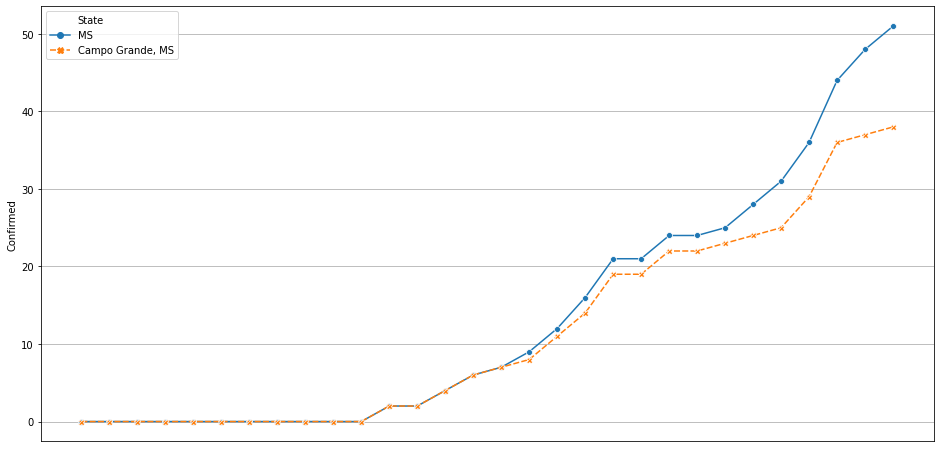

In [51]:
import matplotlib.dates as mdates

_,ax = plt.subplots(figsize=(16,8))

ax.grid(True)
ax.set(xscale="linear", yscale="linear")

# Set ticks every two days.
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
# Set major ticks format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


sns.lineplot(x="Date", y="Confirmed", hue="State", markers=True, data=dftodos, style="State", ax=ax)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


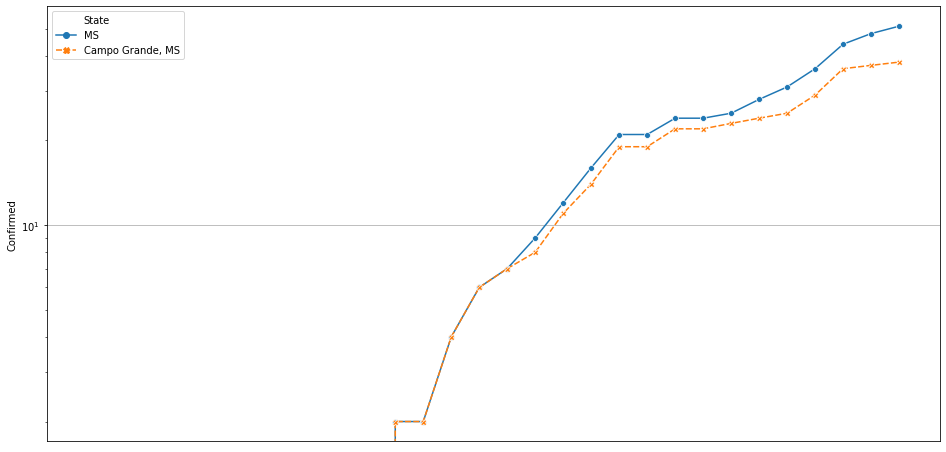

In [52]:
_,ax = plt.subplots(figsize=(16,8))

ax.grid(True)
ax.set(xscale="linear", yscale="log")

# Set ticks every two days.
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
# Set major ticks format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


sns.lineplot(x="Date", y="Confirmed", hue="State", markers=True, data=dftodos, style="State", ax=ax)

#Modelo de predição

## Brasil

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

dfpred = df.copy().groupby('date').sum().reset_index()

dfpred = dfpred[['date','totalCases']]

dfpred.columns = ['ds', 'y']

dfpred.tail(10)

,ds,y
25,2020-03-27,6944
26,2020-03-28,7868
27,2020-03-29,8644
28,2020-03-30,9326
29,2020-03-31,11660
30,2020-04-01,13834
31,2020-04-02,16198
32,2020-04-03,18400
33,2020-04-04,20754
34,2020-04-05,20800


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


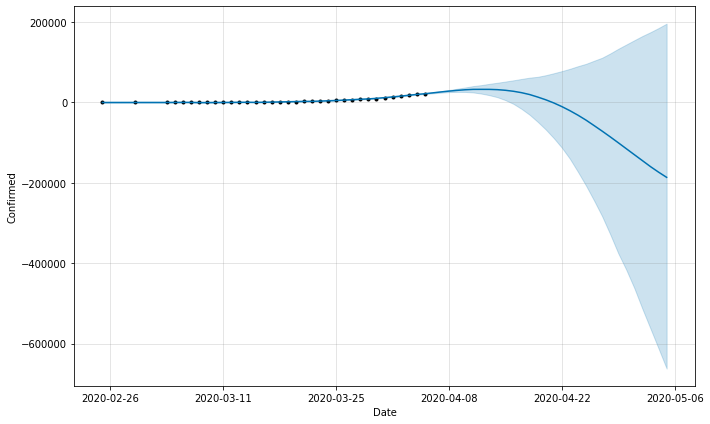

In [54]:
model_cc=Prophet(mcmc_samples = 300, yearly_seasonality=True)
model_cc.fit(dfpred)

future = model_cc.make_future_dataframe(periods=30)

forecast=model_cc.predict(future)
forecast.head(5)

fig_Confirmed = model_cc.plot(forecast,xlabel = "Date",ylabel = "Confirmed")

## MS

In [55]:
dfpred = dfcg.copy()

dfpred = dfpred[['Date','Confirmed']]
dfpred.columns = ['ds', 'y']

dfpred['y'] = pd.to_numeric(dfpred['y'], downcast='float')

dfpred.tail()

,ds,y
25,03-28-2020,25.0
26,03-29-2020,29.0
27,03-30-2020,36.0
28,03-31-2020,37.0
29,04-01-2020,38.0


In [56]:
model_cc=Prophet(mcmc_samples = 300, yearly_seasonality=True)
model_cc.fit(dfpred)

future = model_cc.make_future_dataframe(periods=30)
future.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds
0,2020-02-28
1,2020-03-02
2,2020-03-03
3,2020-03-04
4,2020-03-05


In [57]:
forecast=model_cc.predict(future)
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-28,16.868235,-2.825318,2.321688,-214.763174,209.838644,-17.254821,-210.133724,214.491509,-0.775460,-1.634239,0.109908,-16.479360,-209.633858,214.761544,0.0,0.0,0.0,-0.386586
1,2020-03-02,14.061927,-1.435457,2.923788,-219.494815,220.825621,-13.248703,-219.520024,220.697249,1.039165,0.255399,1.774684,-14.287868,-220.560852,220.918908,0.0,0.0,0.0,0.813224
2,2020-03-03,13.130691,-1.273486,3.019813,-222.315163,225.849965,-12.291709,-225.562897,222.552095,0.930999,0.129068,1.739644,-13.222708,-225.938878,221.886030,0.0,0.0,0.0,0.838983
3,2020-03-04,12.221886,-2.535072,1.745665,-225.054953,229.929539,-12.529941,-230.964183,225.503226,-0.353226,-1.161053,0.389434,-12.176715,-230.773177,225.165833,0.0,0.0,0.0,-0.308055
4,2020-03-05,11.301404,-2.647153,1.726503,-227.234771,233.968275,-11.855581,-235.221713,226.598678,-0.655478,-1.406742,0.124645,-11.200103,-234.281211,227.296404,0.0,0.0,0.0,-0.554177


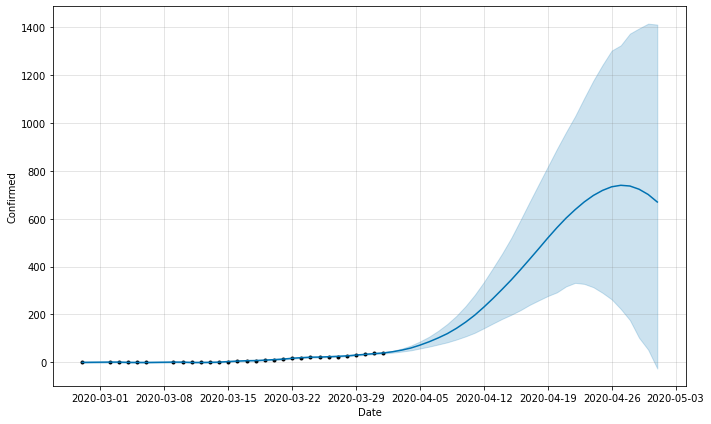

In [58]:
fig_Confirmed = model_cc.plot(forecast,xlabel = "Date",ylabel = "Confirmed")